In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from imblearn.over_sampling import RandomOverSampler
import warnings
warnings.filterwarnings("ignore")

In [36]:
data = pd.read_csv("/cancer patient data sets.csv")
data.columns = data.columns.str.strip()

In [37]:
print(" Columns:", data.columns.tolist())

 Columns: ['index', 'Patient Id', 'Age', 'Gender', 'Air Pollution', 'Alcohol use', 'Dust Allergy', 'OccuPational Hazards', 'Genetic Risk', 'chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking', 'Passive Smoker', 'Chest Pain', 'Coughing of Blood', 'Fatigue', 'Weight Loss', 'Shortness of Breath', 'Wheezing', 'Swallowing Difficulty', 'Clubbing of Finger Nails', 'Frequent Cold', 'Dry Cough', 'Snoring', 'Level']


In [38]:
print(data.head())

   index Patient Id  Age  Gender  Air Pollution  Alcohol use  Dust Allergy  \
0      0         P1   33       1              2            4             5   
1      1        P10   17       1              3            1             5   
2      2       P100   35       1              4            5             6   
3      3      P1000   37       1              7            7             7   
4      4       P101   46       1              6            8             7   

   OccuPational Hazards  Genetic Risk  chronic Lung Disease  ...  Fatigue  \
0                     4             3                     2  ...        3   
1                     3             4                     2  ...        1   
2                     5             5                     4  ...        8   
3                     7             6                     7  ...        4   
4                     7             7                     6  ...        3   

   Weight Loss  Shortness of Breath  Wheezing  Swallowing Difficulty

In [39]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     1000 non-null   int64 
 1   Patient Id                1000 non-null   object
 2   Age                       1000 non-null   int64 
 3   Gender                    1000 non-null   int64 
 4   Air Pollution             1000 non-null   int64 
 5   Alcohol use               1000 non-null   int64 
 6   Dust Allergy              1000 non-null   int64 
 7   OccuPational Hazards      1000 non-null   int64 
 8   Genetic Risk              1000 non-null   int64 
 9   chronic Lung Disease      1000 non-null   int64 
 10  Balanced Diet             1000 non-null   int64 
 11  Obesity                   1000 non-null   int64 
 12  Smoking                   1000 non-null   int64 
 13  Passive Smoker            1000 non-null   int64 
 14  Chest Pain               

In [40]:
print(data.describe().T)

                           count     mean         std   min     25%    50%  \
index                     1000.0  499.500  288.819436   0.0  249.75  499.5   
Age                       1000.0   37.174   12.005493  14.0   27.75   36.0   
Gender                    1000.0    1.402    0.490547   1.0    1.00    1.0   
Air Pollution             1000.0    3.840    2.030400   1.0    2.00    3.0   
Alcohol use               1000.0    4.563    2.620477   1.0    2.00    5.0   
Dust Allergy              1000.0    5.165    1.980833   1.0    4.00    6.0   
OccuPational Hazards      1000.0    4.840    2.107805   1.0    3.00    5.0   
Genetic Risk              1000.0    4.580    2.126999   1.0    2.00    5.0   
chronic Lung Disease      1000.0    4.380    1.848518   1.0    3.00    4.0   
Balanced Diet             1000.0    4.491    2.135528   1.0    2.00    4.0   
Obesity                   1000.0    4.465    2.124921   1.0    3.00    4.0   
Smoking                   1000.0    3.948    2.495902   1.0    2

In [41]:
print(" Missing values:\n",
      data.isna().sum())

 Missing values:
 index                       0
Patient Id                  0
Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64


In [42]:
print(" Unique Risk Levels:", data["Level"].unique())

 Unique Risk Levels: ['Low' 'Medium' 'High']


In [43]:
print("Gender categories:", data["Gender"].unique())

Gender categories: [1 2]


In [44]:
data["Level"] = data["Level"].map({'Low': 0, 'Medium': 1, 'High': 2})

In [45]:
X = data.drop(["Patient Id", "Level"], axis=1)
y = data["Level"]

In [46]:
def custom_palette(custom_colors):
    custompalette = sns.set_palette(sns.color_palette(custom_colors))
    sns.palplot(sns.color_palette(custom_colors), size=0.8)
    plt.tick_params(axis='both', labelsize=0, length=0)
    return custompalette

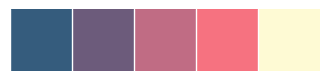

In [47]:
pal = ['#355c7d', '#6c5b7b', '#c06c84', '#f67280', '#FEFAD4']
custom_palette(pal)

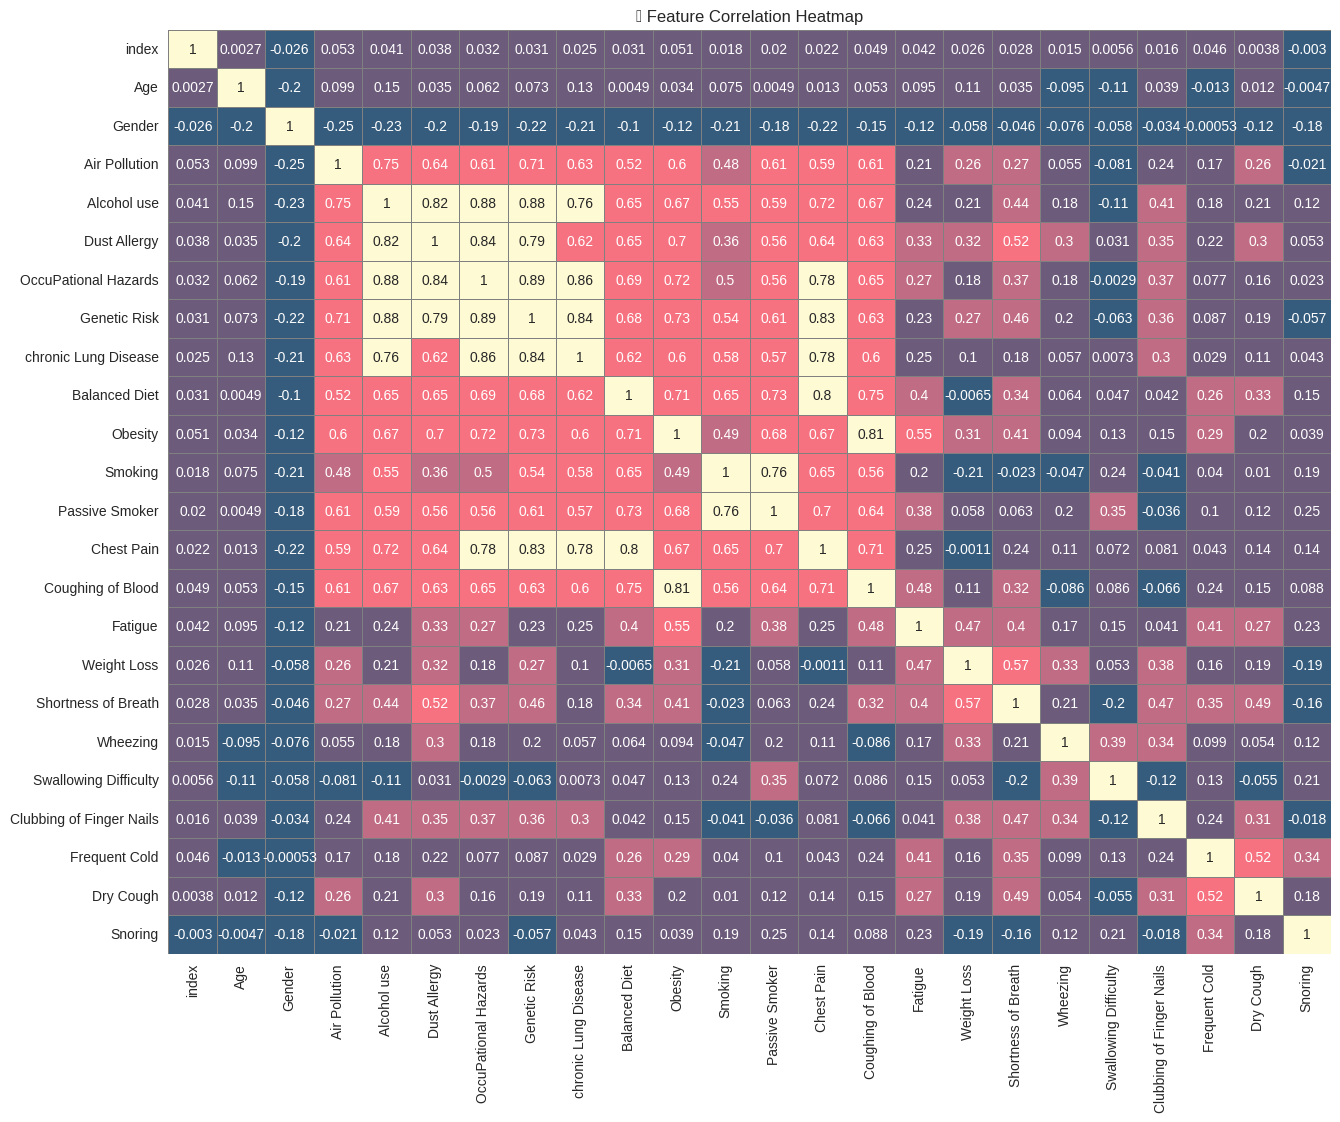

In [48]:
plt.figure(figsize=(15, 12))
sns.heatmap(X.corr(), annot=True, fmt='0.2g', cmap=pal, cbar=False, linewidths=0.7, linecolor='gray')
plt.title("🔗 Feature Correlation Heatmap")
plt.show()

In [49]:
print(f" Low Risk: {sum(data['Level'] == 0)}")
print(f" Medium Risk: {sum(data['Level'] == 1)}")
print(f" High Risk: {sum(data['Level'] == 2)}")

 Low Risk: 303
 Medium Risk: 332
 High Risk: 365


In [50]:
values = data['Level'].value_counts().tolist()
names = list(dict(data['Level'].value_counts()).keys())
fig = px.pie(data, values=values, names=names, hole=0.4, color_discrete_sequence=["blue", "pink", "orange"])
fig.update_layout(title=" Cancer Risk Level Distribution")
fig.show()

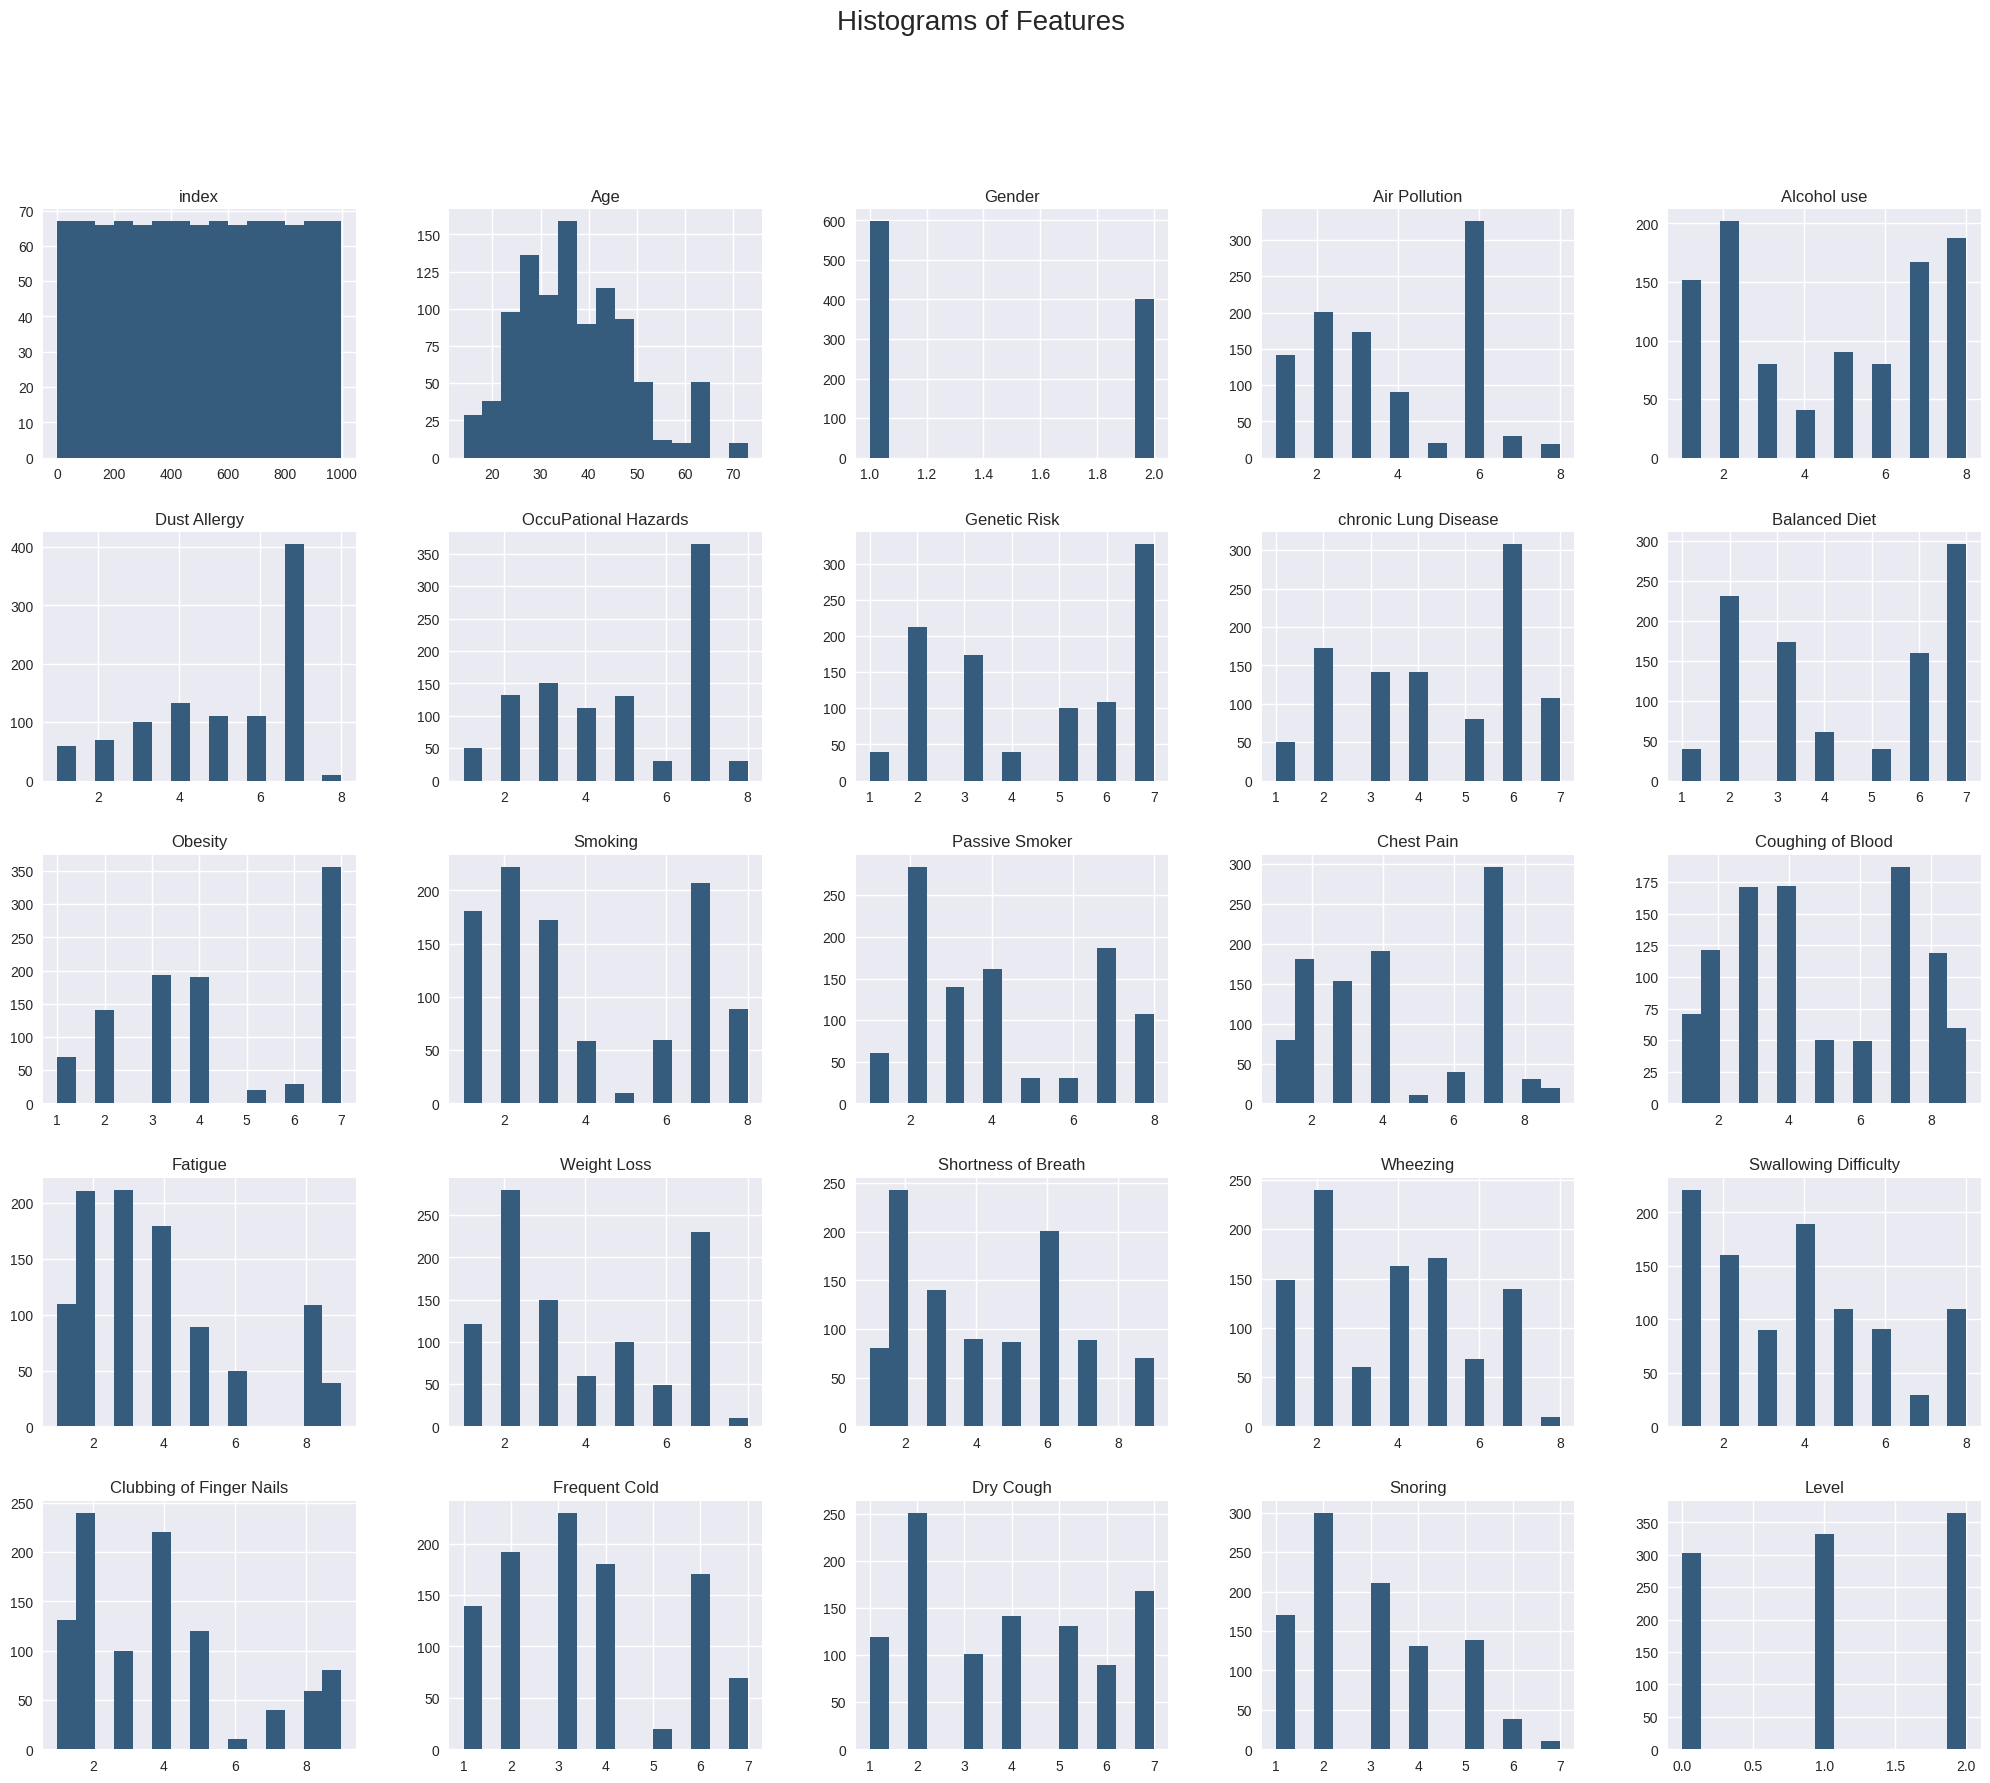

In [51]:
plt.style.use("seaborn-v0_8")
data.hist(figsize=(25, 20), bins=15, color=pal[0])
plt.suptitle("Histograms of Features", fontsize=20)
plt.show()

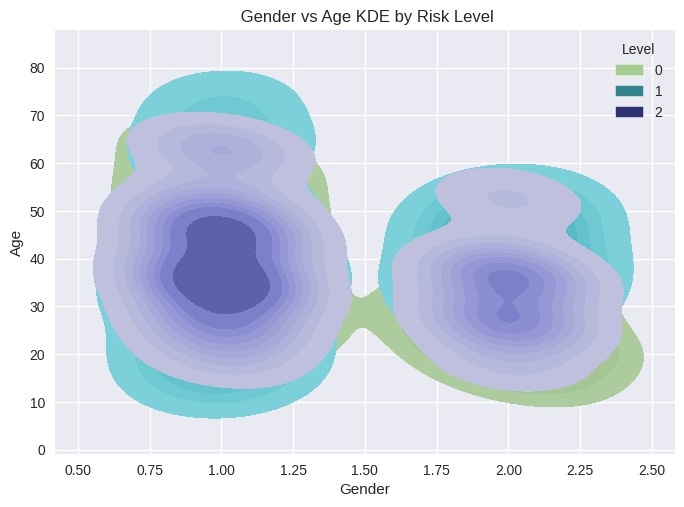

In [52]:
sns.kdeplot(x=data["Gender"], y=data["Age"], hue=data['Level'], palette="crest", fill=True)
plt.title(" Gender vs Age KDE by Risk Level")
plt.show()

In [53]:
over_samp = RandomOverSampler(random_state=0)
X_res, y_res = over_samp.fit_resample(X, y)

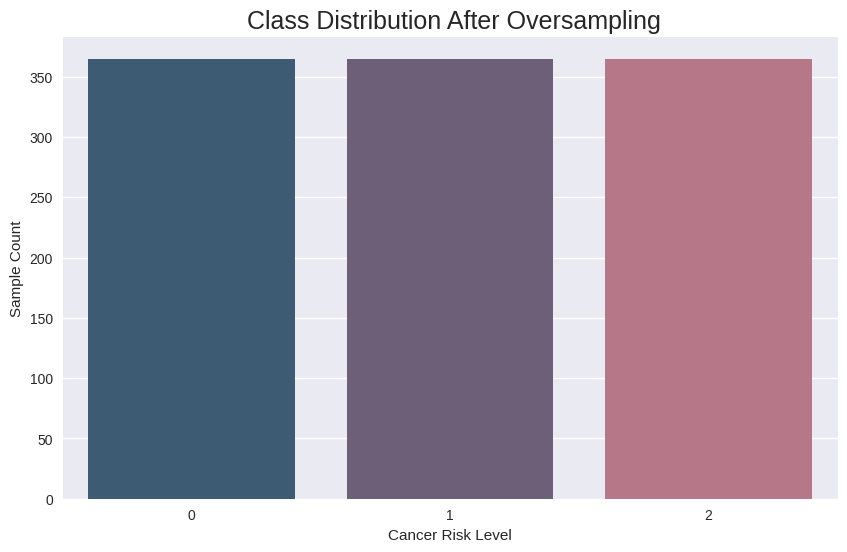

In [62]:
plt.figure(figsize=(10, 6))
sns.countplot(x=y_res, palette=pal)
plt.title(" Class Distribution After Oversampling", fontsize=18)
plt.xlabel("Cancer Risk Level")
plt.ylabel("Sample Count")
plt.show()

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [56]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [57]:
models = {
    "LinearRegression": LinearRegression(),
    "RandomForestRegressor": RandomForestRegressor(random_state=42),
    "DecisionTreeRegressor": DecisionTreeRegressor(random_state=42),
    "SVR": SVR()
}

In [59]:
results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    # Round predictions to get discrete classes
    y_pred_rounded = np.clip(np.round(y_pred), 0, 2).astype(int)

    acc = accuracy_score(y_test, y_pred_rounded)
    print(f"\n {name}")
    print("Accuracy:", round(acc * 100, 2), "%")
    print("Classification Report:\n", classification_report(y_test, y_pred_rounded))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rounded))

    results[name] = acc



 LinearRegression
Accuracy: 96.35 %
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.93      0.97        75
           1       0.90      1.00      0.95        74
           2       1.00      0.96      0.98        70

    accuracy                           0.96       219
   macro avg       0.97      0.96      0.96       219
weighted avg       0.97      0.96      0.96       219

Confusion Matrix:
 [[70  5  0]
 [ 0 74  0]
 [ 0  3 67]]

 RandomForestRegressor
Accuracy: 100.0 %
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        75
           1       1.00      1.00      1.00        74
           2       1.00      1.00      1.00        70

    accuracy                           1.00       219
   macro avg       1.00      1.00      1.00       219
weighted avg       1.00      1.00      1.00       219

Confusion Matrix:
 [[75  0  0]
 [ 0 74  0]
 [ 0  0 70]]